# Ciencia de Datos 
## Luis Carlos Rodriguez Pacheco
## luis.pacheco@ia.center

## Objetivo del reto



### Actividad 1

Utilizando la API de DENUE, extraer datos de su estado y visualizar el top 10 de Clases de actividades económicas

Para hacer esto se necesita:
1. Obtener el token del inegi
2. Hacer la llamada a la api, haciendo una consulta al endpoint BuscarEntidad, con los datos necesarios (numero del estado, registro de inicio, registro final, token)
3. Transformar la respuesta de la API en un dataframe
4. Separar la columna ubicacion en 3 columnas (localidad, municipio, estado)
5. Hacer una grafica bar char sobre cuantos establecimientos hay por clase de actividad economica

### Actividad 2

Seleccionar dos entidades y hacer comparativos sobre la clase de actividad economica

1. Obtener el token del inegi
2. Hacer la llamada a la api, haciendo una consulta al endpoint BuscarEntidad, con los datos necesarios (numero del estado, registro de inicio, registro final, token) para cada estado
3. Transformar las respuestas a dos dataframes
4. Unir los dataframes usando la funcion concat (https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
5. Separar la columna ubicacion en 3 columnas (localidad, municipio, estado)
6. Hacer la comparacion sobre la clase de actividad economica entre los dos estados

**Deadline Sunday 03th** 

*#HappyCoding*



### Importaciones

In [10]:
## Your code
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt


# Actividad 1

### Llamado al api

In [17]:
url='https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/08/1/10000/057726a8-f3aa-4366-bc4c-2c983cff94cd'
response= requests.get(url)

if response.status_code==200:
    content= json.loads(response.content)
    
content

[{'CLEE': '08037713943004851000001033S5',
  'Id': '9020534',
  'Nombre': ' ALCATRAZ GYM',
  'Razon_social': '',
  'Clase_actividad': 'Centros de acondicionamiento físico del sector privado',
  'Estrato': '0 a 5 personas',
  'Tipo_vialidad': 'AVENIDA',
  'Calle': 'TECNOLÓGICO',
  'Num_Exterior': '169',
  'Num_Interior': '2',
  'Colonia': 'PARTIDO IGLESIAS',
  'CP': '32618',
  'Ubicacion': 'JUÁREZ, Juárez, CHIHUAHUA',
  'Telefono': '',
  'Correo_e': '',
  'Sitio_internet': '',
  'Tipo': 'Fijo',
  'Longitud': '-106.42433510',
  'Latitud': '31.70306022',
  'tipo_corredor_industrial': '',
  'nom_corredor_industrial': '',
  'numero_local': ''},
 {'CLEE': '08019522460000612000037857S9',
  'Id': '9047235',
  'Nombre': ' SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1',
  'Razon_social': 'CASA DE AMIGOS DE MEXICO S DE RL DE CV',
  'Clase_actividad': 'Sociedades financieras de objeto múltiple',
  'Estrato': '0 a 5 personas',
  'Tipo_vialidad': 'AVENIDA',
  'Calle': 'IGNACIO VALLARTA',
  'Num_Exte

#### Convertir a dataframe el JSON

In [18]:
df = pd.DataFrame(content)

#### Analizando el dataFrame

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLEE                      10000 non-null  object
 1   Id                        10000 non-null  object
 2   Nombre                    10000 non-null  object
 3   Razon_social              10000 non-null  object
 4   Clase_actividad           10000 non-null  object
 5   Estrato                   10000 non-null  object
 6   Tipo_vialidad             10000 non-null  object
 7   Calle                     10000 non-null  object
 8   Num_Exterior              10000 non-null  object
 9   Num_Interior              10000 non-null  object
 10  Colonia                   10000 non-null  object
 11  CP                        10000 non-null  object
 12  Ubicacion                 10000 non-null  object
 13  Telefono                  10000 non-null  object
 14  Correo_e               

In [20]:
df.sample(10)

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
3741,08019461110044461000000000U3,7222980,ABARROTES GALER,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,MINERAL DE TURUACHITO,5129,0,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",6141543043,,,Fijo,-106.10482851,28.74372306,,,
1081,08037461110069341000000000U9,545570,ABARROTES ANITA,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,ISLAS HEBRIDAS,2613,0,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.52095451,31.72560587,,,
3541,08043461110000341000000000U9,7258028,ABARROTES FANY,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,803,,...,"MATACHÍ, Matachí, CHIHUAHUA",,,,Fijo,-107.75242078,28.84242934,,,
4841,08019461110001151000000000U1,600024,ABARROTES LA BARCA,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,LAZARO CARDENAS DEL RIO,311,0,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",,,,Fijo,-106.10916239,28.69270357,,,
5827,08037461110107511000000000U1,8663158,ABARROTES LEO,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,TLAPA,4703,,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.49486215,31.70379982,,,
9450,08019461110031412000000000U1,6191829,ABARROTES Y CARNICERIA RIVERO,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,MANUEL ACUÑA,2402,,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",6144111358,REYRESRIVER2011@HOTMAIL.COM,,Fijo,-106.08355784,28.62222457,,,
1356,08037461110020111000000000U4,629034,ABARROTES BETTY,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,JOSE CONTRERAS AGUILERA,3155,30,...,"JUÁREZ, Juárez, CHIHUAHUA",6567017831,,,Fijo,-106.36922224,31.58943029,,,
3163,08037461110116891000000000U6,9384579,ABARROTES EL ROKY,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,68,,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.32204080,31.60702625,,,
5752,08017461110002521000000000U8,540948,ABARROTES LAS MS,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,DECIMA OCTAVA,,,...,"CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA",6255827523,,,Fijo,-106.86625716,28.39434018,,,
7767,08037461110002491000000000U2,627491,ABARROTES PATY,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,BERNARDO NORZAGARAY,7448,,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.39227136,31.64127988,,,


In [29]:
df['localidad', 'municipio', 'estado'] = df.Ubicacion.str.split(',')


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CLEE                            10000 non-null  object
 1   Id                              10000 non-null  object
 2   Nombre                          10000 non-null  object
 3   Razon_social                    10000 non-null  object
 4   Clase_actividad                 10000 non-null  object
 5   Estrato                         10000 non-null  object
 6   Tipo_vialidad                   10000 non-null  object
 7   Calle                           10000 non-null  object
 8   Num_Exterior                    10000 non-null  object
 9   Num_Interior                    10000 non-null  object
 10  Colonia                         10000 non-null  object
 11  CP                              10000 non-null  object
 12  Ubicacion                       10000 non-null 

In [32]:
df.sample(10)

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,"(localidad, municipio, estado)"
3045,08037461110059841001000000U0,536285,ABARROTES EL PEQUE,,"Comercio al por menor en tiendas de abarrotes,...",6 a 10 personas,CALLE,SINALOA,5840,,...,,,,Fijo,-106.53239954,31.72823175,,,,"[JUÁREZ, Juárez, CHIHUAHUA]"
7101,08019461110002651000000000U9,609685,ABARROTES MICHELL,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,OSCAR ORNELAS,5117,,...,6142011542,,,Fijo,-106.06680765,28.66494755,,,,"[CHIHUAHUA, Chihuahua, CHIHUAHUA]"
2626,08037461110048901000000000U6,626128,ABARROTES EDDIE,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,ZAFRA,8104,,...,,,,Fijo,-106.40813405,31.64624186,,,,"[JUÁREZ, Juárez, CHIHUAHUA]"
9984,08017621211001151000000000S8,7940205,AC DENTAL,,Consultorios dentales del sector privado,0 a 5 personas,CALLE,JORGE CASTILLO CABRERA,,,...,,,,Fijo,-106.84030010,28.40100563,,,,"[CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA]"
6765,08019461110012941000000000U2,602722,ABARROTES MARY,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,IBARRA,7105,,...,6144172253,,,Fijo,-106.10372564,28.68028323,,,,"[CHIHUAHUA, Chihuahua, CHIHUAHUA]"
8119,08037461110051901000000000U0,624908,ABARROTES RICOLU,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,CERRO DEL INDIO,9305,,...,6566747513,,,Fijo,-106.46396023,31.65935049,,,,"[JUÁREZ, Juárez, CHIHUAHUA]"
7095,08037461110013871000000000U2,624559,ABARROTES MICHEL,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,DE LAS ALTURAS,11128,,...,6562767441,,,Fijo,-106.52790030,31.62028029,,,,"[JUÁREZ, Juárez, CHIHUAHUA]"
6113,08019461110009641000000000U3,539082,ABARROTES LOS CUATES GUTIERREZ,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,FECAM,1426,,...,6144836921,,,Fijo,-106.15325175,28.73542104,,,,"[CHIHUAHUA, Chihuahua, CHIHUAHUA]"
7142,08017461110011191000000000U9,578529,ABARROTES MILY,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,32,0,0,...,,,,Fijo,-106.86709107,28.38484766,,,,"[CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA]"
4053,08037461110095671000000000U7,7031106,ABARROTES HERMANOS HUIZAR,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,CONGRESO NACIONAL CONSTITUYENTES,,,...,,,,Fijo,-106.38031657,31.64377529,,,,"[JUÁREZ, Juárez, CHIHUAHUA]"


#### Obteniedno valores mas comunes

In [35]:
df['Clase_actividad'].value_counts()

Clase_actividad
Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas    9111
Comercio al por menor en minisupers                                           296
Bufetes jurídicos                                                              68
Comercio al por mayor de abarrotes                                             43
Comercio al por menor de ropa, excepto de bebé y lencería                      22
                                                                             ... 
Servicios de fotografía y videograbación                                        1
Servicios de limpieza de tapicería, alfombras y muebles                         1
Comercio al por menor de otros artículos de uso personal                        1
Servicios veterinarios para mascotas prestados por el sector privado            1
Comercio al por menor de pisos y recubrimientos cerámicos                       1
Name: count, Length: 144, dtype: int64

#### Graficando valores mas comunes

In [51]:
valores_tipicos = df['Clase_actividad'].value_counts()[2:11]

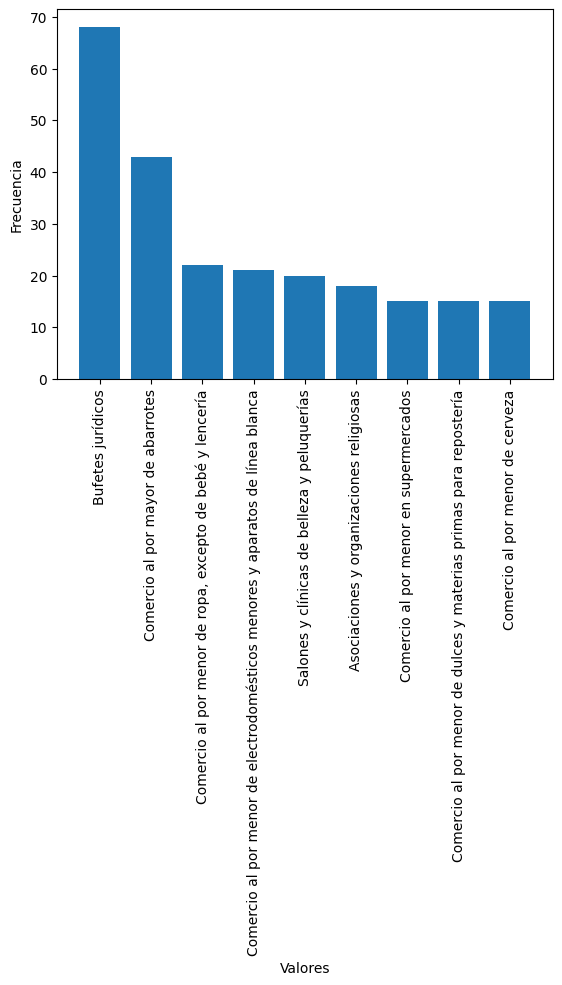

<Figure size 800x4000 with 0 Axes>

In [52]:
# Crear la gráfica de barras
plt.bar(valores_tipicos.index, valores_tipicos.values)

# Agregar etiquetas
plt.xlabel('Valores')
plt.ylabel('Frecuencia')



# Mostrar la gráfica
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mayor legibilidad
plt.figure(figsize=(8, 40))
plt.show()

# Actividad2

#### Llamado a APIS

##### comparacion Chihuahua y Quintana Roo

In [54]:
url1='https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/08/1/10000/057726a8-f3aa-4366-bc4c-2c983cff94cd'
url2='https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/23/1/10000/057726a8-f3aa-4366-bc4c-2c983cff94cd'
responsechih= requests.get(url)
responseqroo= requests.get(url2)
if responsechih.status_code==200:
    contentch= json.loads(response.content)

if responseqroo.status_code==200:
    contentqroo= json.loads(responseqroo.content)
    

#### Conversion a dataframes

In [55]:
dfch = pd.DataFrame(contentch)
dfqroo = pd.DataFrame(contentqroo)

In [128]:
dfch[dfch['Clase_actividad'] == 'Asociaciones y organizaciones religiosas']

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
35,08037813210006101001000000U6,629650,10 A IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS,10 A IGLESIA APOSTÓLICA DE LA FE EN CRISTO JESUS,Asociaciones y organizaciones religiosas,11 a 30 personas,CALLE,CARTAGENA,7134,,...,"JUÁREZ, Juárez, CHIHUAHUA",6562103410,,,Fijo,-106.45617223,31.70011134,,,
43,08019813210007861000000000U2,7187681,11 IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS,,Asociaciones y organizaciones religiosas,0 a 5 personas,CALLE,AEROPUERTO DE DUBAI,8303,,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",,,,Fijo,-106.01164443,28.65487287,,,
49,08037813210009631000000000U9,555886,14AVA IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS,,Asociaciones y organizaciones religiosas,0 a 5 personas,PRIVADA,PAPAYA,6484,0,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.40435285,31.65853436,,,
61,08037813210014161000000000U0,544897,19VA IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS,19VA IGLESIA APOSTÓLICA DE LA FE EN CRISTO JES...,Asociaciones y organizaciones religiosas,0 a 5 personas,CALLE,TOMATE,11237,0,...,"JUÁREZ, Juárez, CHIHUAHUA",6562252145,,,Fijo,-106.57430370,31.77471735,,,
64,08013813210000061000000000U9,615722,1RA IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS,IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS DI...,Asociaciones y organizaciones religiosas,0 a 5 personas,AVENIDA,16 DE SEPTIEMBRE,,,...,"CASAS GRANDES, Casas Grandes, CHIHUAHUA",6361213597,,,Fijo,-107.95373439,30.37800599,,,
78,08037813210009372001000000U0,561076,23 AVA IGLESIA APOSTOLICA DE LA FE EN DIOS A.R.,23 AVA IGLESIA APOSTOLICA DE LA FE EN DIOS AR,Asociaciones y organizaciones religiosas,11 a 30 personas,CALLE,PUERTO ISABEL,1452,,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.33957751,31.61242270,,,
91,08037813210003941001000000U8,622198,24AVA IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS,IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS AR,Asociaciones y organizaciones religiosas,0 a 5 personas,CALLE,LUCIO CABAÑAS,7,,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.38232294,31.68349965,,,
99,08037813210011611000000000U7,558574,25VA IGLESIA APOSTOLICA DE LA FE EN CRISTO JES...,,Asociaciones y organizaciones religiosas,0 a 5 personas,CALLE,TURQUESA,,,...,"JUÁREZ, Juárez, CHIHUAHUA",6563410287,,,Fijo,-106.47544280,31.63358281,,,
102,08037813210001791000000000U9,537391,29AVA IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS,,Asociaciones y organizaciones religiosas,0 a 5 personas,PRIVADA,DE ARNICA,2005,0,...,"JUÁREZ, Juárez, CHIHUAHUA",6564488542,,,Fijo,-106.51657523,31.76363710,,,
104,08032813210000161001000000U7,529724,2DA IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS,IGLESIA APOSTOLICA DE LA FE EN CRISTO JESUS DI...,Asociaciones y organizaciones religiosas,11 a 30 personas,CALLE,OJO DE LA ALMACEÑA,21,0,...,"HIDALGO DEL PARRAL, Hidalgo del Parral, CHIHUAHUA",6275272895,,,Fijo,-105.70634655,26.93702765,,,


In [125]:
act.head(50)

Clase_actividad
Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas                                     9111
Comercio al por menor en minisupers                                                                            296
Bufetes jurídicos                                                                                               68
Comercio al por mayor de abarrotes                                                                              43
Comercio al por menor de ropa, excepto de bebé y lencería                                                       22
Comercio al por menor de electrodomésticos menores y aparatos de línea blanca                                   21
Salones y clínicas de belleza y peluquerías                                                                     20
Asociaciones y organizaciones religiosas                                                                        18
Comercio al por menor en supermercados                          

In [56]:
dfch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLEE                      10000 non-null  object
 1   Id                        10000 non-null  object
 2   Nombre                    10000 non-null  object
 3   Razon_social              10000 non-null  object
 4   Clase_actividad           10000 non-null  object
 5   Estrato                   10000 non-null  object
 6   Tipo_vialidad             10000 non-null  object
 7   Calle                     10000 non-null  object
 8   Num_Exterior              10000 non-null  object
 9   Num_Interior              10000 non-null  object
 10  Colonia                   10000 non-null  object
 11  CP                        10000 non-null  object
 12  Ubicacion                 10000 non-null  object
 13  Telefono                  10000 non-null  object
 14  Correo_e               

In [57]:
dfqroo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLEE                      10000 non-null  object
 1   Id                        10000 non-null  object
 2   Nombre                    10000 non-null  object
 3   Razon_social              10000 non-null  object
 4   Clase_actividad           10000 non-null  object
 5   Estrato                   10000 non-null  object
 6   Tipo_vialidad             10000 non-null  object
 7   Calle                     10000 non-null  object
 8   Num_Exterior              10000 non-null  object
 9   Num_Interior              10000 non-null  object
 10  Colonia                   10000 non-null  object
 11  CP                        10000 non-null  object
 12  Ubicacion                 10000 non-null  object
 13  Telefono                  10000 non-null  object
 14  Correo_e               

#### Concatenando

In [58]:
dfestados = pd.concat([dfch, dfqroo])

In [59]:
dfestados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CLEE                      20000 non-null  object
 1   Id                        20000 non-null  object
 2   Nombre                    20000 non-null  object
 3   Razon_social              20000 non-null  object
 4   Clase_actividad           20000 non-null  object
 5   Estrato                   20000 non-null  object
 6   Tipo_vialidad             20000 non-null  object
 7   Calle                     20000 non-null  object
 8   Num_Exterior              20000 non-null  object
 9   Num_Interior              20000 non-null  object
 10  Colonia                   20000 non-null  object
 11  CP                        20000 non-null  object
 12  Ubicacion                 20000 non-null  object
 13  Telefono                  20000 non-null  object
 14  Correo_e                  20

In [60]:
dfestados.sample(10)

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
7308,08011461110003431000000000U2,586126,ABARROTES MOYER,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,CTM,410,,...,"SANTA ROSALÍA DE CAMARGO, Camargo, CHIHUAHUA",,,,Fijo,-105.18206560,27.66048523,,,
264,08037461190003441000000000U8,7057218,A LO QUE VINO VINO A COMER ELOTES CON EL HIJO ...,A LO QUE VINO VINO A COMER ELOTES CON EL HIJO ...,Comercio al por menor de otros alimentos,0 a 5 personas,CALLE,LUCERO,0,0,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.40697581,31.62009664,,,
1079,08037461110098491000000000U7,8172757,ABARROTES ANITA,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,BALTAZAR ADAME,,,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.39177632,31.63930593,,,
4491,23005531114000652000000000S7,8763377,ADMINISTRACION DE PLAZA LA TECNOLOGIA,PASAJE DE LA ELECTRONICA EL SALVADOR SA DE CV,Alquiler sin intermediación de oficinas y loca...,6 a 10 personas,AVENIDA,NIÑOS HEROES,228,,...,"CANCÚN, Benito Juárez, QUINTANA ROO",,,,Fijo,-86.85007455,21.18011400,CENTRO Y PLAZA COMERCIAL,CENTRO COMERCIAL LAS AMERICAS CANCUN II,SEGUNDO NIVEL
8762,08037561432003441000000000U3,562069,ABARROTES SMAILI,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,JOSE MARIA MORELOS,198,,...,"JUÁREZ, Juárez, CHIHUAHUA",6563565453,,,Fijo,-106.31389243,31.60264774,,,
6604,08036461110003031000000000U7,526113,ABARROTES MARI CRUZ,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,21 DE MARZO,,,...,"JOSÉ MARIANO JIMÉNEZ, Jiménez, CHIHUAHUA",6295420577,,,Fijo,-104.92530785,27.12008577,,,
2288,23008461110008511000000000U3,3620796,ABARROTES LA GUADALUPE,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,68 NORTE,11,0,...,"PLAYA DEL CARMEN, Solidaridad, QUINTANA ROO",,,,Fijo,-87.06798599,20.64693907,,,
2020,23004461110017721000000000U6,7838653,ABARROTES KIKE,ABARROTES KIKE,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,TAMPICO,,,...,"CALDERITAS, Othón P. Blanco, QUINTANA ROO",,,,Fijo,-88.26137891,18.55192627,,,
34,08019722514000371000000000U4,571667,"1,2,3 TACOS",,Restaurantes con servicio de preparación de ta...,0 a 5 personas,AVENIDA,20 DE NOVIEMBRE,2709,,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",6141726054,,,Fijo,-106.06223951,28.63870235,,,
1423,08019461110046451000000000U2,7235855,ABARROTES BORUNDA,,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,5 DE OCTUBRE,2311,0,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",6141062945,,,Fijo,-106.11175911,28.60031810,,,


#### Conversion de ubicacion 

In [91]:
dfestados[['localidad', 'municipio', 'estado']] = dfestados['Ubicacion'].str.split(', ', expand=True)
dfestados

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,"(localidad, municipio, estado)",ubicacion,ubicaciondiv,localidad,municipio,estado
0,08037713943004851000001033S5,9020534,ALCATRAZ GYM,,Centros de acondicionamiento físico del sector...,0 a 5 personas,AVENIDA,TECNOLÓGICO,169,2,...,31.70306022,,,,"[JUÁREZ, Juárez, CHIHUAHUA]","[JUÁREZ, Juárez, CHIHUAHUA]","[JUÁREZ, Juárez, CHIHUAHUA]",JUÁREZ,Juárez,CHIHUAHUA
1,08019522460000612000037857S9,9047235,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,AVENIDA,IGNACIO VALLARTA,5709,6,...,28.67275577,,,,"[CHIHUAHUA, Chihuahua, CHIHUAHUA]","[CHIHUAHUA, Chihuahua, CHIHUAHUA]","[CHIHUAHUA, Chihuahua, CHIHUAHUA]",CHIHUAHUA,Chihuahua,CHIHUAHUA
2,08019522460000602000037857S0,9047233,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,CALLE,JUAN ALDAMA,93100,,...,28.40425242,,,,"[CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA]","[CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA]","[CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA]",CUAUHTÉMOC,Cuauhtémoc,CHIHUAHUA
3,08037522460000352000037857S4,9047138,SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,BOULEVARD,MANUEL GOMEZ MORIN,8704,,...,31.70292415,,,,"[JUÁREZ, Juárez, CHIHUAHUA]","[JUÁREZ, Juárez, CHIHUAHUA]","[JUÁREZ, Juárez, CHIHUAHUA]",JUÁREZ,Juárez,CHIHUAHUA
4,08037468412000671012001068M4,6293691,"""",SERVICIO NUEVO MILENIO SA DE CV,Comercio al por menor de gasolina y diesel,11 a 30 personas,CALLE,SEVILLA,5161,,...,31.71298329,,,,"[JUÁREZ, Juárez, CHIHUAHUA]","[JUÁREZ, Juárez, CHIHUAHUA]","[JUÁREZ, Juárez, CHIHUAHUA]",JUÁREZ,Juárez,CHIHUAHUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23005519122000052000000000U9,3630013,BIBLIOTECA PUBLICA 17 DE FEBRERO,H AYUNTAMIENTO DE BENITO JUAREZ,Bibliotecas y archivos del sector público,6 a 10 personas,CALLE,LEONA VICARIO,,,...,21.08944578,,,,"[ALFREDO V. BONFIL, Benito Juárez, QUINTANA ...","[ALFREDO V. BONFIL, Benito Juárez, QUINTANA ...","[ALFREDO V. BONFIL, Benito Juárez, QUINTANA ...",ALFREDO V. BONFIL,Benito Juárez,QUINTANA ROO
9996,23008519122000032000000000U5,7875349,BIBLIOTECA PUBLICA ANGELES MASTRETTA,SECRETARIA DE CULTURA,Bibliotecas y archivos del sector público,6 a 10 personas,CALLE,CHECHEN,,,...,20.51307748,,,,"[PUERTO AVENTURAS, Solidaridad, QUINTANA ROO]","[PUERTO AVENTURAS, Solidaridad, QUINTANA ROO]","[PUERTO AVENTURAS, Solidaridad, QUINTANA ROO]",PUERTO AVENTURAS,Solidaridad,QUINTANA ROO
9997,23006519122000023000000000U8,3614798,BIBLIOTECA PUBLICA CONSTITUYENTES DEL 1974,MUNICIPIO DE JOSE MARIA MORELOS,Bibliotecas y archivos del sector público,11 a 30 personas,CALLE,CONSTITUYENTES DEL 74,,,...,19.74705862,,,,"[JOSÉ MARÍA MORELOS, José María Morelos, QUI...","[JOSÉ MARÍA MORELOS, José María Morelos, QUI...","[JOSÉ MARÍA MORELOS, José María Morelos, QUI...",JOSÉ MARÍA MORELOS,José María Morelos,QUINTANA ROO
9998,23004519122000021000000000U7,3621760,BIBLIOTECA PUBLICA DEL INSTITUTO DE SEGURIDAD ...,INSTITUTO DE SEGURIDAD Y SERVICIOS SOCIALES DE...,Bibliotecas y archivos del sector público,0 a 5 personas,CALLE,RUFO FIGUEROA,,,...,18.51707050,,,,"[CHETUMAL, Othón P. Blanco, QUINTANA ROO]","[CHETUMAL, Othón P. Blanco, QUINTANA ROO]","[CHETUMAL, Othón P. Blanco, QUINTANA ROO]",CHETUMAL,Othón P. Blanco,QUINTANA ROO


In [92]:
dfestados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   CLEE                            20000 non-null  object
 1   Id                              20000 non-null  object
 2   Nombre                          20000 non-null  object
 3   Razon_social                    20000 non-null  object
 4   Clase_actividad                 20000 non-null  object
 5   Estrato                         20000 non-null  object
 6   Tipo_vialidad                   20000 non-null  object
 7   Calle                           20000 non-null  object
 8   Num_Exterior                    20000 non-null  object
 9   Num_Interior                    20000 non-null  object
 10  Colonia                         20000 non-null  object
 11  CP                              20000 non-null  object
 12  Ubicacion                       20000 non-null  obje

#### Graficando

In [108]:
valores_tipicoschih = dfestados[dfestados['estado'] == 'CHIHUAHUA']['Clase_actividad'].value_counts()[1:11]
valores_tipicosqroo = dfestados[dfestados['estado'] == 'QUINTANA ROO']['Clase_actividad'].value_counts()[1:11]

C:\Users\Luis Carlos\AppData\Local\Temp\ipykernel_4076\382570163.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


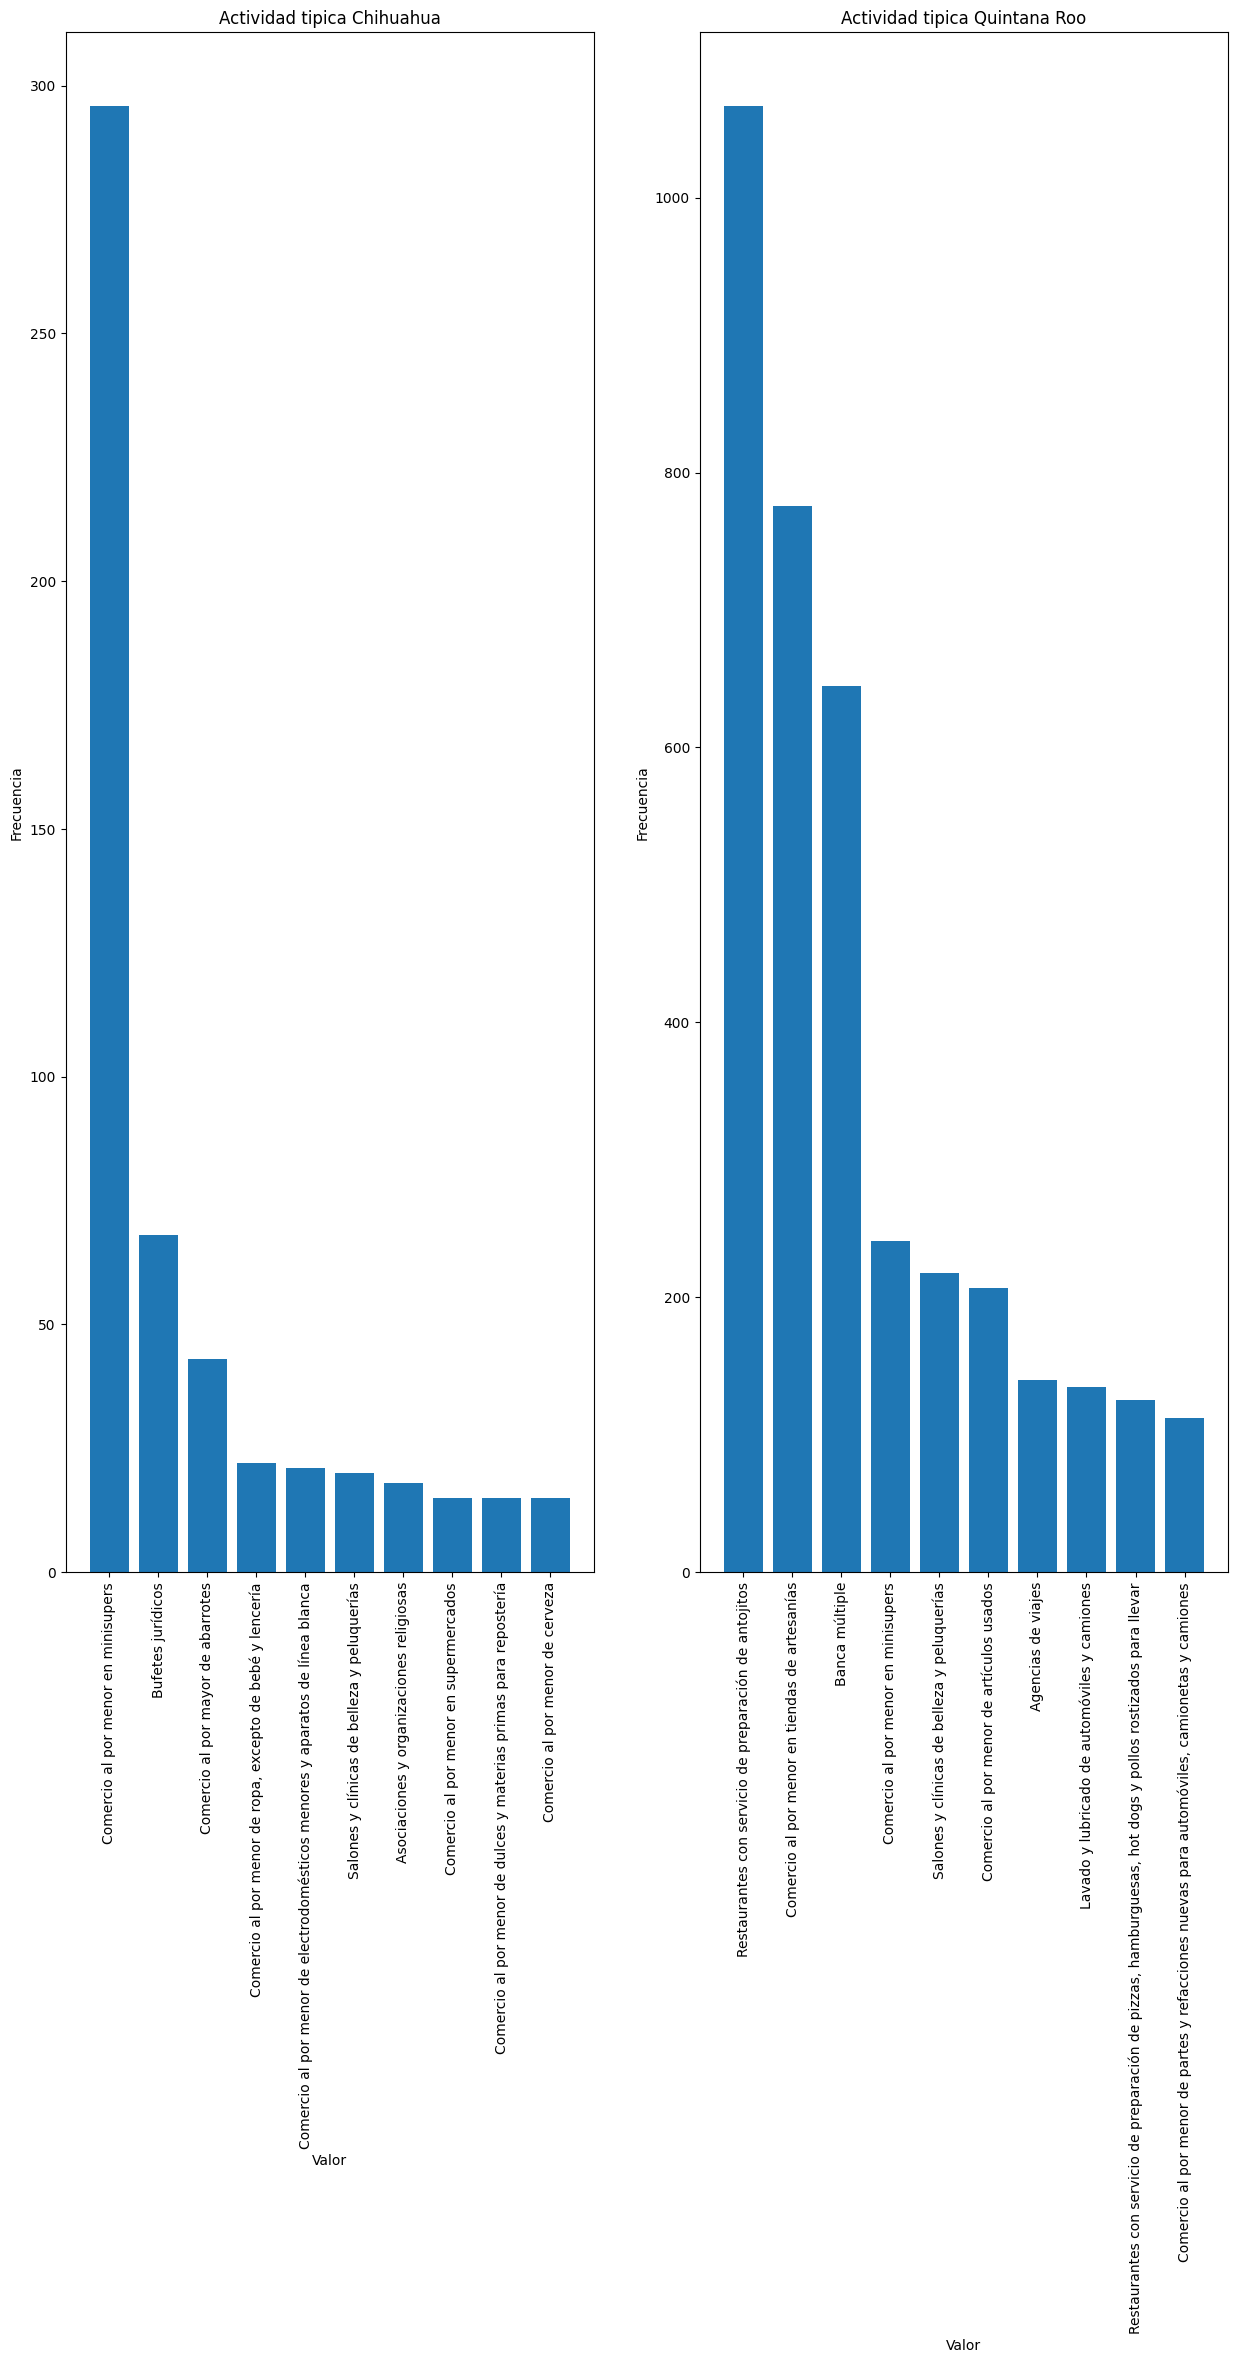

In [120]:
fig, axs = plt.subplots(1, 2, figsize=(15, 20))
axs[0].bar(valores_tipicoschih.index, valores_tipicoschih.values)
axs[0].set_title('Actividad tipica Chihuahua')
axs[0].set_xlabel('Valor')
axs[0].set_ylabel('Frecuencia')

axs[1].bar(valores_tipicosqroo.index, valores_tipicosqroo.values)
axs[1].set_title('Actividad tipica Quintana Roo')
axs[1].set_xlabel('Valor')
axs[1].set_ylabel('Frecuencia')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)